# Data Visualization with Matplotlib
### matplotlib.pyplot interface

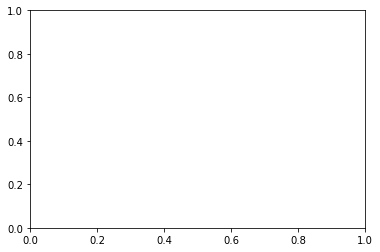

In [1]:
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

In [11]:
import pandas as pd
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')
seattle_weather.head()

,STATION,NAME,DATE,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USC00456295,"PALMER 3 ESE, WA US",1,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,...,310.0,310.0,34.0,168.0,327.0,615.0,877.0,987.0,1000.0,2.8
1,USC00456295,"PALMER 3 ESE, WA US",2,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,...,280.0,280.0,33.9,132.0,275.0,515.0,800.0,963.0,1000.0,3.1
2,USC00456295,"PALMER 3 ESE, WA US",3,50.0,11.0,1.0,-7777.0,-7777.0,0.0,0.0,...,310.0,310.0,35.9,5.0,47.0,111.0,393.0,848.0,1000.0,2.1
3,USC00456295,"PALMER 3 ESE, WA US",4,108.0,40.0,12.0,7.0,3.0,-7777.0,0.0,...,300.0,300.0,38.3,0.0,0.0,5.0,123.0,571.0,978.0,2.0
4,USC00456295,"PALMER 3 ESE, WA US",5,255.0,130.0,56.0,38.0,19.0,1.0,-7777.0,...,310.0,310.0,43.5,0.0,0.0,0.0,0.0,83.0,610.0,2.0


### Adding data to an Axes object

In [14]:
mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dic'}
seattle_weather['MONTH'] = seattle_weather['DATE'].map(mapping)
austin_weather['MONTH'] = austin_weather['DATE'].map(mapping)

In [42]:
seattle_weather = seattle_weather.groupby('MONTH', as_index=False)[seattle_weather.columns].mean()
austin_weather = austin_weather.groupby('MONTH', as_index=False)[austin_weather.columns].mean()

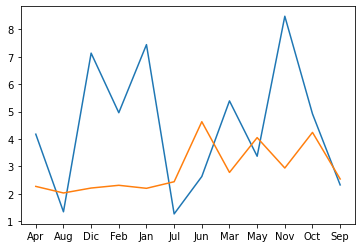

In [43]:
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])
plt.show()

## Customizing your plots
### Data appearance, axis labels and adding titles

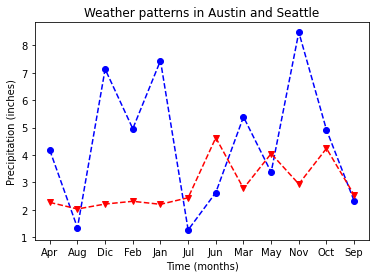

In [44]:
fig, ax = plt.subplots()
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--')

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Call show to display the resulting plot
plt.show()

## Small multiples

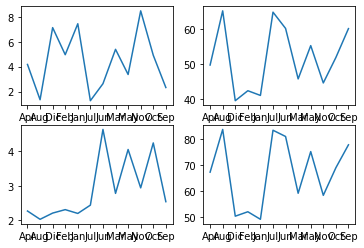

In [45]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

### Small multiples with shared y axis

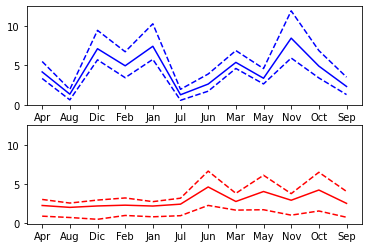

In [46]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')
plt.show()

## Plotting time-series data

In [47]:
climate_change = pd.read_csv('climate_change.csv', parse_dates=['date'],index_col='date')
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


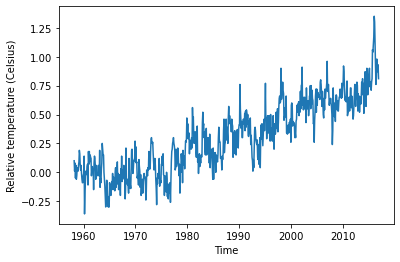

In [48]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### Using a time index to zoom in

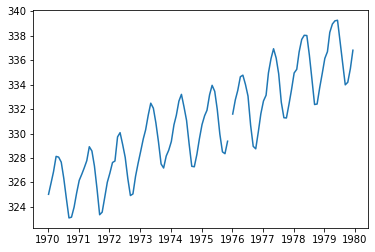

In [49]:
fig ,ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

## Plotting time-series with different variables
### Plotting two variables

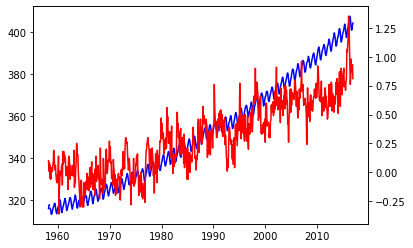

In [50]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

### Defining a function that plots time-series data

In [51]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

### Using a plotting function

In [52]:
climate_change = pd.read_csv('climate_change.csv')
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


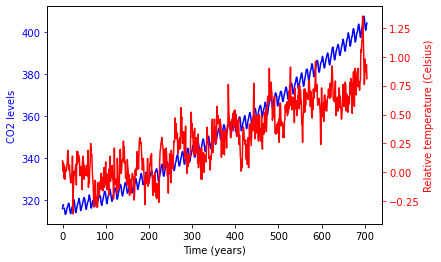

In [53]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

## Annotating time-series data
### Annotating a plot of time-series data

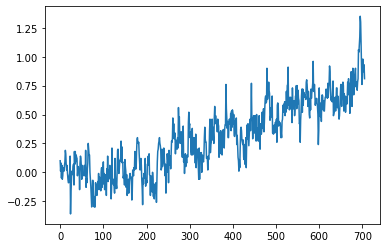

In [67]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))
plt.show()

### Putting it all together

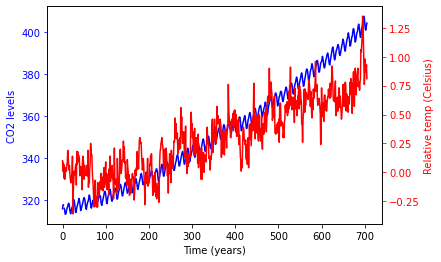

In [64]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()

## Quantitative comparisons and statistical visualizations
### Quantitative comparisons: bar-charts

In [70]:
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


/var/folders/4n/dll6nv094h5fm4m2lhzkmtd40000gn/T/ipykernel_33929/2016095535.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


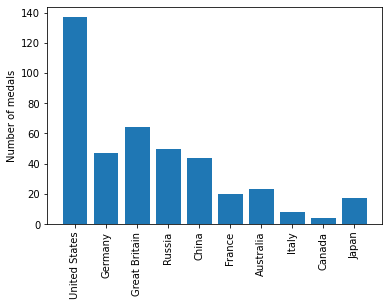

In [71]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

### Stacked bar chart

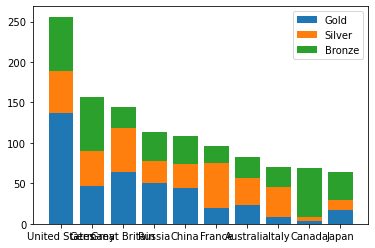

In [73]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label = 'Bronze')

# Display the legend
ax.legend()

plt.show()

### Histograms

In [77]:
summer2016 = pd.read_csv('summer2016.csv')
mens_rowing = summer2016.query("Sport == 'Rowing'")
mens_gymnastics = summer2016.query("Sport == 'Gymnastics'")

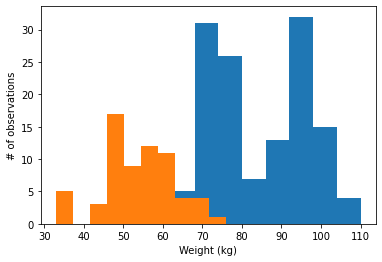

In [78]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

### "Step" histogram

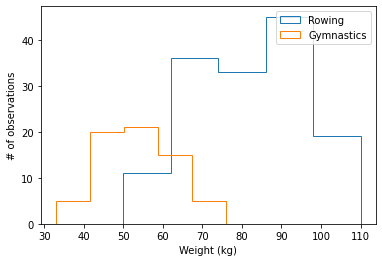

In [79]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], label="Rowing", histtype='step', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], label="Gymnastics", histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Statistical plotting
### Adding error-bars to a bar chart

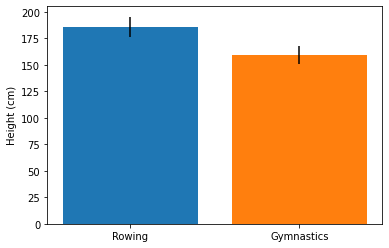

In [80]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Adding error-bars to a plot

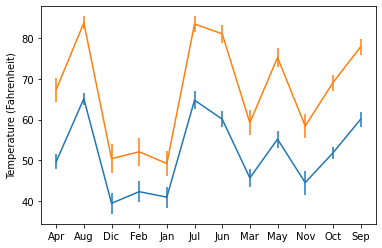

In [81]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"]) 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### Creating boxplots

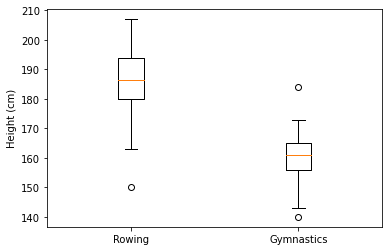

In [82]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

## Scatter plots

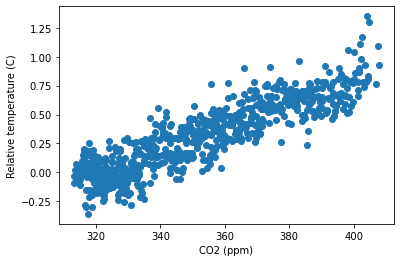

In [83]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

### Encoding time by color

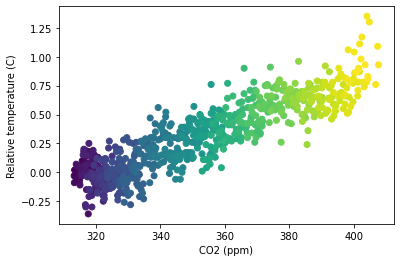

In [84]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

## Sharing visualizations with others
### Switching between styles

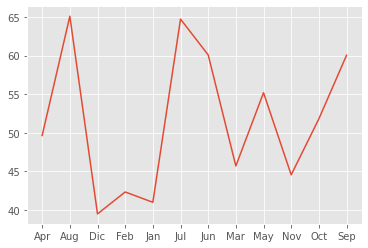

In [85]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

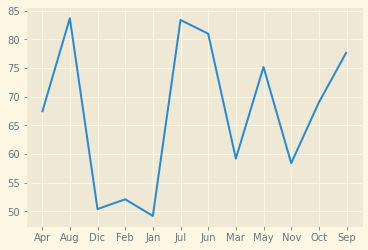

In [86]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use("Solarize_Light2")
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

### Saving a file several times

In [87]:
# Save as a PNG file with 300 dpi
fig.savefig("my_figure_300dpi.png", dpi=300)

### Save a figure with different sizes

In [88]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png')

## Automating figures from data

In [91]:
# Extract the "Sport" column
sports_column = summer2016["Sport"]

# Find the unique values of the "Sport" column
sports = summer2016["Sport"].unique()
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

## Automate your visualization

/var/folders/4n/dll6nv094h5fm4m2lhzkmtd40000gn/T/ipykernel_33929/3202711841.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


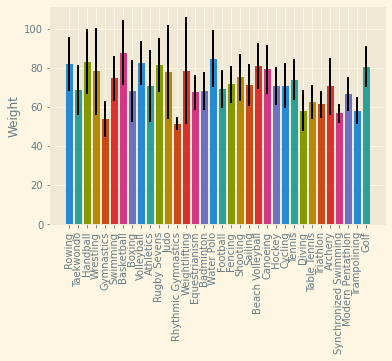

In [93]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer2016[summer2016["Sport"]==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")